In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [3]:
# Load the dataset
file_path = 'synthetic_dataset_savethestray.csv'  # Update the path if needed
dataset = pd.read_csv(file_path)

# # Remove the risk_category column
# dataset = dataset.drop(columns=['risk_category'])

In [5]:
# Separate features and target variable
X = dataset.drop(columns=['risk_score'])
y = dataset['risk_score']

In [7]:
# One-hot encoding for categorical features
categorical_features = ['time_of_day', 'weather', 'area_type', 'traffic_level']
encoder = OneHotEncoder(sparse_output=False)  # Updated argument
X_encoded = encoder.fit_transform(X[categorical_features])

# Standardize numerical features
numerical_features = ['latitude', 'longitude', 'animal_sightings']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[numerical_features])

# Combine preprocessed categorical and numerical features
X_preprocessed = np.hstack((X_scaled, X_encoded))

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

In [11]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Define ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=1e-6)

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

In [13]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
# Adjusted model with Batch Normalization, Dropout, and increased layers
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='relu')  # Sigmoid activation for binary classification
])

C:\Users\ADEEB\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [17]:

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    verbose=1
)

Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.0000e+00 - loss: 1.0026 - val_accuracy: 0.0000e+00 - val_loss: 0.6792
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: 0.6729 - val_accuracy: 0.0000e+00 - val_loss: 0.6552
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0000e+00 - loss: 0.6557 - val_accuracy: 0.0000e+00 - val_loss: 0.6493
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0000e+00 - loss: 0.6429 - val_accuracy: 0.0000e+00 - val_loss: 0.6422
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: 0.6382 - val_accuracy: 0.0000e+00 - val_loss: 0.6430
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: 0.6371 - val_accuracy: 0.0000e+00 - val_loss: 0.6437
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.6321 - val_accuracy: 0.0000e+00 - val_loss: 0.6385
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/s

In [18]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.6308
Test Loss: 0.631128191947937, Test Accuracy: 0.0


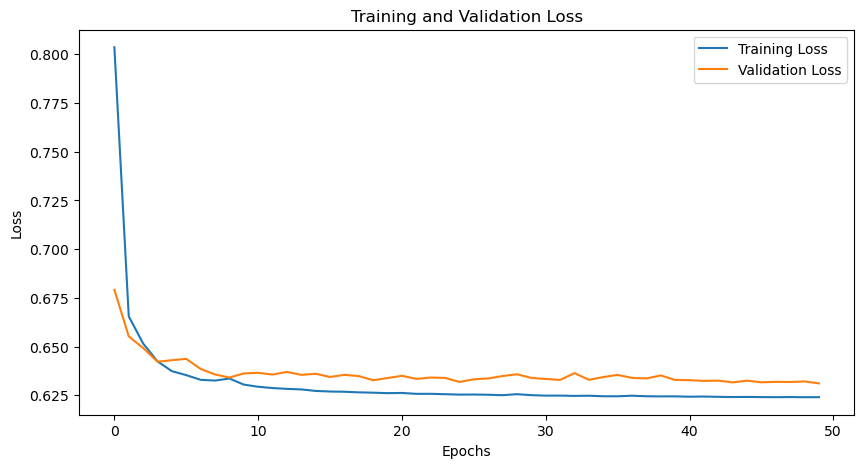

In [19]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [20]:
# Evaluate the model
loss, mae = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {loss}, Test Mean Absolute Error: {mae}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.6308
Test Loss: 0.631128191947937, Test Mean Absolute Error: 0.0


In [29]:
from sklearn.metrics import mean_absolute_percentage_error, r2_score
y_pred = model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [31]:
# Compute Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape * 100:.2f}%")

Mean Absolute Percentage Error (MAPE): 6.94%


In [33]:
# Compute R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2:.2f}")

R-squared (R²): 0.93


In [35]:
# Approximate Percentage Accuracy (based on MAPE)
accuracy = 100 - mape * 100
print(f"Approximate Accuracy: {accuracy:.2f}%")

Approximate Accuracy: 93.06%
